In [14]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import LinearSVC

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 3 columns):
v1       5576 non-null object
v2       5576 non-null object
Count    5576 non-null int64
dtypes: int64(1), object(2)
memory usage: 130.8+ KB
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...


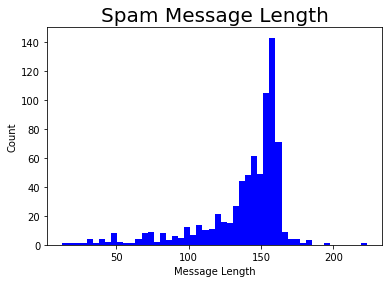

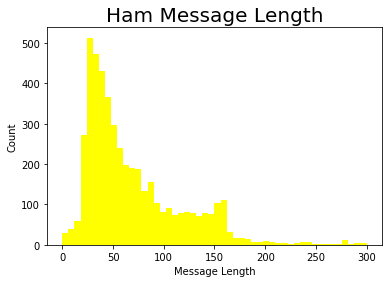

<class 'scipy.sparse.csr.csr_matrix'>
[[1449    1]
 [  63  160]]
Accuracy : 0.96175 


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1450
           1       0.99      0.72      0.83       223

    accuracy                           0.96      1673
   macro avg       0.98      0.86      0.91      1673
weighted avg       0.96      0.96      0.96      1673

Accuracy: 
 0.9903181189488244


In [ ]:
df = pd.read_csv(r"C:/Users/DELL/Desktop/spam doc/ai project/spam classifier/dataset/spam one.csv",encoding='latin-1')

df.head()

df.tail()

df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]
df.head()

import numpy as np
df['Count']=0
for i in np.arange(0,len(df.v2)):
    df.loc[i,'Count'] = len(df.loc[i,'v2'])

df.head()

df.tail()

df['v1'].value_counts()

df.info()

corpus = []
ps = PorterStemmer()

print (df['v2'][2])
print (df['v2'][3])

df.groupby('v1').describe()

df.rename(columns={'v1':'label','v2':'sms'},inplace=True)

df.label.value_counts()

df.sms.value_counts()

df.groupby('sms').describe()

df.groupby('label').describe()

df.rename(columns={'v1':'label','v2':'sms'},inplace=True)

df.label.value_counts()

df['sms length'] = df['sms'].apply(len)
df.head()

plt.hist(df[df['label']=='spam']['sms length'],color='blue',bins=50)
plt.title('Spam Message Length',fontsize=20)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

plt.hist(df[df['label']=='ham']['sms length'],color='yellow',bins=50,range=(0,300))
plt.title('Ham Message Length',fontsize=20)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

import string
ps = PorterStemmer()

def process_sms(sms):
    
    sms = sms.translate(str.maketrans('','',string.punctuation)) 
    sms = sms.split()
    sms = [ps.stem(word) for word in sms if len(word) > 2]
    sms = ' '.join(sms)
    return sms

df['sms'] = df.sms.apply(process_sms)

df['label'] = df.label.map({'ham':0, 'spam':1})
df.head()

df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]
df.head()

tfidf = TfidfVectorizer(encoding='latin-1',stop_words='english',analyzer='word',lowercase=True,smooth_idf=True)

X_train,X_test,y_train,y_test = train_test_split(df['sms'],df['label'],test_size = 0.30, random_state =7)

features_train = tfidf.fit_transform(X_train)
features_test = tfidf.transform(X_test)
print(type(features_train))
pd.DataFrame(features_train.todense(),columns=tfidf.get_feature_names())

model = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=None)
model.fit(features_train,y_train)

y_pred_dt = model.predict(features_test)

cm = confusion_matrix(y_test, y_pred_dt)

print(cm)

print ("Accuracy : %0.5f \n\n" % accuracy_score(y_test, model.predict(features_test)))
print (classification_report(y_test, model.predict(features_test)))



exec(open('C:/Users/DELL/Desktop/spam doc/ai project/spam classifier/spamRF.py').read())